## Exploratory data analisys and Data Preparation
### Missing Values

1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

2. Dataset importing (local and drive modes)

In [2]:
# Local importing
energy_dataframe = pd.read_excel('Energy _data (1).xlsx') # Comment if you want to load the file from repo
# Web importing
# energy_dataframe = pd.read_excel('https://github.com/GianRojas/CrystalTEC-EnergyData/raw/main/Energy%20_data%20(1).xlsx')
energy_dataframe

,Hour,energy_consumpt_2001,energy_consumpt_2002,full_temp_2001,full_humid_2001,full_temp_2002,full_humid_2002
0,1,631.623161,835.021567,-0.400000,64.000000,7.600000,82.000000
1,2,534.397104,711.875374,-0.733333,65.333333,7.733333,78.666667
2,3,453.538784,592.673215,-1.066667,66.666667,7.866667,75.333333
3,4,400.699718,526.997961,-1.400000,68.000000,8.000000,72.000000
4,5,378.171092,497.588642,-1.666667,60.333333,8.333333,69.666667
...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN


3. Split dataframe by year

In [3]:
# 2001 dataframe
df_2001 = energy_dataframe[['Hour','energy_consumpt_2001','full_temp_2001','full_humid_2001']]
df_2001 = df_2001.rename({'energy_consumpt_2001':'energy_consumpt', 'full_temp_2001':'full_temp', 'full_humid_2001':'full_humid'}, axis=1)
df_2001.insert(loc=0, column="year", value='2001')

# 2002 dataframe
df_2002 = energy_dataframe[['Hour','energy_consumpt_2002','full_temp_2002','full_humid_2002']]
df_2002 = df_2002.rename({'energy_consumpt_2002':'energy_consumpt', 'full_temp_2002':'full_temp', 'full_humid_2002':'full_humid'}, axis=1)
df_2002.insert(loc=0, column="year", value='2002')
df_2002

,year,Hour,energy_consumpt,full_temp,full_humid
0,2002,1,835.021567,7.600000,82.000000
1,2002,2,711.875374,7.733333,78.666667
2,2002,3,592.673215,7.866667,75.333333
3,2002,4,526.997961,8.000000,72.000000
4,2002,5,497.588642,8.333333,69.666667
...,...,...,...,...,...
8779,2002,8780,0.000000,NaN,NaN
8780,2002,8781,0.000000,NaN,NaN
8781,2002,8782,0.000000,NaN,NaN
8782,2002,8783,0.000000,NaN,NaN


4. Compare count of measures

In [4]:
print(f"df_2001 rows: {df_2001.Hour.count()}\ndf_2002 rows: {df_2002.Hour.count()}")

df_2001 rows: 8784
df_2002 rows: 8784


theres is more measures than hours in a normal year (8760)  
Take a look on last 24 values

In [5]:
df_2001.compare(df_2002, align_axis=0).tail(24)

year  energy_consumpt  full_temp  full_humid
8772 self   2001       843.230570   8.800000   35.000000
     other  2002         0.000000        NaN         NaN
8773 self   2001       862.376112   9.866667   33.666667
     other  2002         0.000000        NaN         NaN
8774 self   2001       885.214790  10.933333   32.333333
     other  2002         0.000000        NaN         NaN
8775 self   2001       904.754785  12.000000   31.000000
     other  2002         0.000000        NaN         NaN
8776 self   2001       960.265378   9.333333   40.666667
     other  2002         0.000000        NaN         NaN
8777 self   2001      1008.915444   6.666667   50.333333
     other  2002         0.000000        NaN         NaN
8778 self   2001       994.170651   4.000000   60.000000
     other  2002         0.000000        NaN         NaN
8779 self   2001       950.369306   3.333333   64.000000
     other  2002         0.000000        NaN         NaN
8780 self   2001       880.138770   2.666667   68.000000
     other  2002         0.000000        NaN         NaN
8781 self   2001       792.754026   2.000000   72.000000
     other  2002         0.000000        NaN         NaN
8782 self   2001       740.446668   1.333333   76.000000
     other  2002         0.000000        NaN         NaN
8783 self   2001       706.176769   0.666667   80.000000
     other  2002         0.000000        NaN         NaN

4. Clean data2002 dataframe

last 24 items of 2002 data are blank measures for humid and temp. zeros in **energy_consumpt**

In [6]:
df_2002.tail(24)

,year,Hour,energy_consumpt,full_temp,full_humid
8760,2002,8761,0.0,NaN,NaN
8761,2002,8762,0.0,NaN,NaN
8762,2002,8763,0.0,NaN,NaN
8763,2002,8764,0.0,NaN,NaN
8764,2002,8765,0.0,NaN,NaN
8765,2002,8766,0.0,NaN,NaN
8766,2002,8767,0.0,NaN,NaN
8767,2002,8768,0.0,NaN,NaN
8768,2002,8769,0.0,NaN,NaN
8769,2002,8770,0.0,NaN,NaN


If we assume that the variable **energy_consumpt** is dependent on the variables **full_temp** and **full_humid** then we will omit these last 24 values

In [7]:
df_2002 = df_2002.iloc[:-24]

now the number of values in **data2002** is exact to the total hours of a year

In [8]:
df_2002['Hour'].count() 

8760

Last 24 values of 2001 it semms valid measures so lets keep them.

6. Merging dataframes

In [9]:
df2=pd.concat([df_2001, df_2002], axis=0)
df2

,year,Hour,energy_consumpt,full_temp,full_humid
0,2001,1,631.623161,-0.400000,64.000000
1,2001,2,534.397104,-0.733333,65.333333
2,2001,3,453.538784,-1.066667,66.666667
3,2001,4,400.699718,-1.400000,68.000000
4,2001,5,378.171092,-1.666667,60.333333
...,...,...,...,...,...
8755,2002,8756,1295.271939,5.933333,62.000000
8756,2002,8757,1181.771718,5.066667,67.000000
8757,2002,8758,1051.278230,4.200000,72.000000
8758,2002,8759,983.742983,3.333333,77.000000


7. Check for inner NA values

In [10]:
df2.isna().sum()

year                0
Hour                0
energy_consumpt    34
full_temp           0
full_humid          0
dtype: int64


6. Visual analisys   
the values for 5 first days show us a pattern 

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

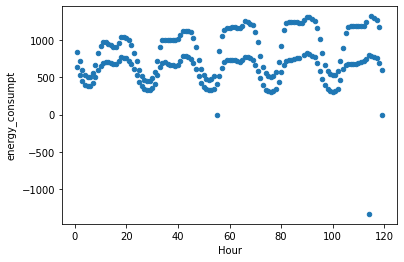

In [22]:
df2.query('Hour<120').plot.scatter(x='Hour', y='energy_consumpt')

Lets zoom near a missing value

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

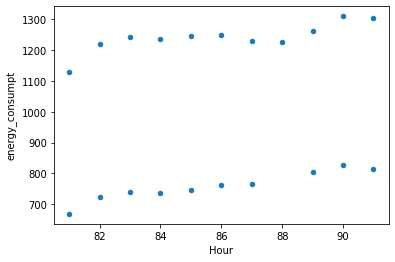

In [23]:
df2.query('80<Hour<92').plot.scatter(x='Hour', y='energy_consumpt')

each point in this pattern would must be bettwen its left neighbor and right neighbor  
we can use linear interpolation to fill these missing values (like Hour=88)

In [24]:
df2['energy_consumpt'] = df2['energy_consumpt'].interpolate()
df2.isna().sum()

year               0
Hour               0
energy_consumpt    0
full_temp          0
full_humid         0
dtype: int64

Now the missing values are filled with relevant data

### Handling Outliers
lets see a **energy_consumpt** plot

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

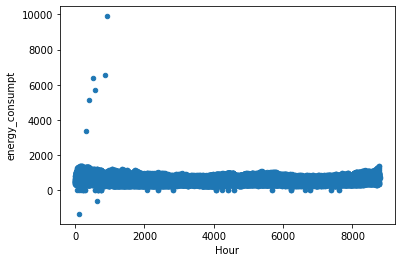

In [25]:
df2.plot.scatter(x='Hour', y='energy_consumpt')

It seems there is some outliers. we'll analize data with boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

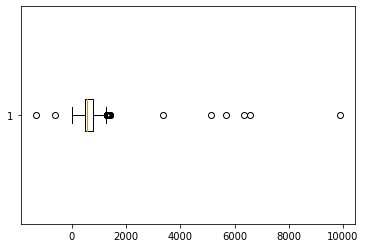

In [27]:
plt.boxplot(df2['energy_consumpt'], vert=False)
plt.show

In [16]:
df2.describe()

,Hour,energy_consumpt,full_temp,full_humid
count,17544.000000,17510.000000,17544.000000,17544.000000
mean,4386.508208,627.649406,17.899761,61.839318
std,2532.344653,249.044930,7.880001,18.972915
min,1.000000,-1332.918388,-3.200000,3.000000
25%,2193.750000,472.463379,12.000000,47.000000
50%,4386.500000,574.686250,18.000000,64.666667
75%,6579.250000,794.234635,23.933333,77.333333
max,8784.000000,9896.924643,41.000000,100.000000
